# Importing Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reading Data

In [73]:
train_data = pd.read_csv("TRAIN.csv")
test_data = pd.read_csv('TEST_FINAL.csv')
sample_submission = pd.read_csv('SAMPLE.csv')

In [74]:
train_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [75]:
test_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


# Exploratory Data Analysis

In [76]:
train_data.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [77]:
test_data.dtypes

ID               object
Store_id          int64
Store_Type       object
Location_Type    object
Region_Code      object
Date             object
Holiday           int64
Discount         object
dtype: object

In [78]:
## Checking Number of Unique Stores in train and test set
print("Number of unique stores in Train Data : "+str(train_data['Store_id'].nunique()))
print("Number of unique stores in Test Data : "+str(test_data['Store_id'].nunique()))

Number of unique stores in Train Data : 365
Number of unique stores in Test Data : 365


# Transforming into Regression Problem

In [79]:
train_data.nunique() # Cardinality Check

ID               188340
Store_id            365
Store_Type            4
Location_Type         5
Region_Code           4
Date                516
Holiday               2
Discount              2
#Order              299
Sales             47422
dtype: int64

In [80]:
test_data.nunique()

ID               22265
Store_id           365
Store_Type           4
Location_Type        5
Region_Code          4
Date                61
Holiday              2
Discount             2
dtype: int64

# Exploratory Data Analysis

In [81]:
train_data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [82]:
test_data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [83]:
## Checking Region Wise Sales
region_data = train_data.groupby('Region_Code').agg({'Sales':'sum',
                                     'Store_id':'nunique',
                                                   '#Order':'sum'
                                                    })

In [84]:
region_data.head()

,Sales,Store_id,#Order
Region_Code,,,
R1,2.992243e+09,124,5094794
R2,2.170172e+09,105,3402429
R3,1.870205e+09,86,2834847
R4,1.025381e+09,50,1513790


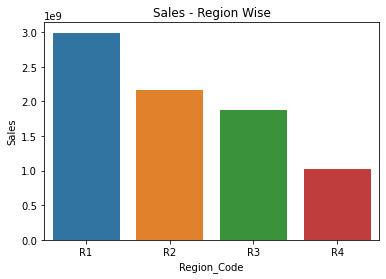

In [89]:
sns.barplot(y = 'Sales',x = region_data.index,data = region_data)
plt.title('Sales - Region Wise')
plt.show()

In [90]:
## Checking location Wise Sales
location_type_data = train_data.groupby('Location_Type').agg({'Sales':'sum',
                                     'Store_id':'nunique',
                                                   '#Order':'sum'
                                                    })

In [91]:
location_type_data

,Sales,Store_id,#Order
Location_Type,,,
L1,3.529359e+09,165,5556742
L2,2.872964e+09,94,4600675
L3,9.897865e+08,58,1590881
L4,3.149745e+08,21,513475
L5,3.509163e+08,27,584087


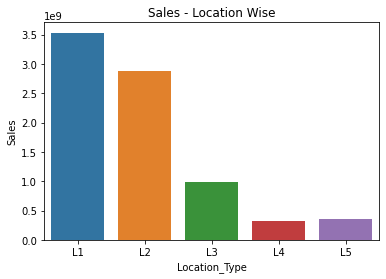

In [92]:
sns.barplot(y = 'Sales',x = location_type_data.index,data = location_type_data)
plt.title('Sales - Location Wise')
plt.show()

In [93]:
## Checking Region Wise Sales
holiday_data = train_data.groupby('Holiday').agg({'Sales':'sum',
                                     'Store_id':'nunique',
                                                   '#Order':'sum'
                                                    })

In [94]:
holiday_data

,Sales,Store_id,#Order
Holiday,,,
0,7.178085e+09,365,11425695
1,8.799156e+08,365,1420165


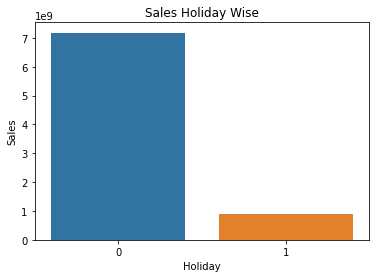

In [95]:
sns.barplot(y = 'Sales',x = holiday_data.index,data = holiday_data)
plt.title('Sales Holiday Wise')
plt.show()

# Creating Datetime Features

In [96]:
train_data['Date'] = pd.to_datetime(train_data['Date'],format = '%Y-%m-%d')

In [97]:
test_data['Date'] = pd.to_datetime(test_data['Date'],format = '%Y-%m-%d')

In [98]:
train_data['Day'] = train_data['Date'].dt.day

In [99]:
test_data['Day'] = test_data['Date'].dt.day

In [100]:
train_data['Day_Name'] = train_data['Date'].dt.strftime("%A")

In [101]:
test_data['Day_Name'] = test_data['Date'].dt.strftime("%A")

In [102]:
train_data.tail()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Day,Day_Name
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00,31,Friday
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64,31,Friday
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56,31,Friday
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41,31,Friday
188339,T1188340,152,S2,L1,R1,2019-05-31,1,No,47,37977.00,31,Friday


In [103]:
test_data.tail()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Day,Day_Name
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No,31,Wednesday
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No,31,Wednesday
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes,31,Wednesday
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No,31,Wednesday
22264,T1210605,365,S2,L1,R2,2019-07-31,0,No,31,Wednesday


# Subsetting Variables

In [104]:
train_data.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales', 'Day', 'Day_Name'],
      dtype='object')

In [105]:
X = train_data[['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Day','Day_Name',
       'Holiday', 'Discount']]

In [106]:
y = train_data['Sales']

# Subsetting Categorical Variables

In [107]:
numeric_cols = ['Day']
categorical_cols = ['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Day','Day_Name',
       'Holiday', 'Discount']

## Min Max Scaling Numeric Columns

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X[numeric_cols])


## One Hot Encoding Categorical Columns

In [109]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(X[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [110]:
X.head()

,Store_id,Store_Type,Location_Type,Region_Code,Day,Day_Name,Holiday,Discount
0,1,S1,L3,R1,1,Monday,1,Yes
1,253,S4,L2,R1,1,Monday,1,Yes
2,252,S3,L2,R1,1,Monday,1,Yes
3,251,S2,L3,R1,1,Monday,1,Yes
4,250,S2,L3,R4,1,Monday,1,Yes


In [111]:
X[numeric_cols] = scaler.transform(X[numeric_cols])
X[encoded_cols] = encoder.transform(X[categorical_cols])

<ipython-input-111-6d478ddb4482>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_cols] = scaler.transform(X[numeric_cols])
C:\Users\INNODVOH\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\INNODVOH\Anaconda3\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [112]:
all_cols = numeric_cols + encoded_cols

In [113]:
all_cols

['Day',
 'Store_id_1',
 'Store_id_2',
 'Store_id_3',
 'Store_id_4',
 'Store_id_5',
 'Store_id_6',
 'Store_id_7',
 'Store_id_8',
 'Store_id_9',
 'Store_id_10',
 'Store_id_11',
 'Store_id_12',
 'Store_id_13',
 'Store_id_14',
 'Store_id_15',
 'Store_id_16',
 'Store_id_17',
 'Store_id_18',
 'Store_id_19',
 'Store_id_20',
 'Store_id_21',
 'Store_id_22',
 'Store_id_23',
 'Store_id_24',
 'Store_id_25',
 'Store_id_26',
 'Store_id_27',
 'Store_id_28',
 'Store_id_29',
 'Store_id_30',
 'Store_id_31',
 'Store_id_32',
 'Store_id_33',
 'Store_id_34',
 'Store_id_35',
 'Store_id_36',
 'Store_id_37',
 'Store_id_38',
 'Store_id_39',
 'Store_id_40',
 'Store_id_41',
 'Store_id_42',
 'Store_id_43',
 'Store_id_44',
 'Store_id_45',
 'Store_id_46',
 'Store_id_47',
 'Store_id_48',
 'Store_id_49',
 'Store_id_50',
 'Store_id_51',
 'Store_id_52',
 'Store_id_53',
 'Store_id_54',
 'Store_id_55',
 'Store_id_56',
 'Store_id_57',
 'Store_id_58',
 'Store_id_59',
 'Store_id_60',
 'Store_id_61',
 'Store_id_62',
 'Store_i

In [114]:
X_new  = X[all_cols]

In [115]:
X_new.head()

,Day,Store_id_1,Store_id_2,Store_id_3,Store_id_4,Store_id_5,Store_id_6,Store_id_7,Store_id_8,Store_id_9,...,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,Holiday_0,Holiday_1,Discount_No,Discount_Yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Transforming Test Set

In [116]:
X_test = test_data.copy().drop('ID',axis = 1)

In [117]:
X_test.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Day,Day_Name
0,171,S4,L2,R3,2019-06-01,0,No,1,Saturday
1,172,S1,L1,R1,2019-06-01,0,No,1,Saturday
2,173,S4,L2,R1,2019-06-01,0,No,1,Saturday
3,174,S1,L1,R4,2019-06-01,0,No,1,Saturday
4,170,S1,L1,R2,2019-06-01,0,No,1,Saturday


In [118]:
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [119]:
X_test[encoded_cols] = encoder.transform(X_test[categorical_cols])

In [120]:
all_cols = numeric_cols + encoded_cols

In [121]:
X_test_new = X_test[all_cols]

# Basic Modelling

In [122]:
from xgboost import XGBRegressor


In [135]:
model = XGBRegressor(random_state=42, n_jobs=-1,max_depth = 10,n_estimators = 1000)


In [136]:
model.fit(X_new,y)

KeyboardInterrupt: 

In [125]:
preds = model.predict(X_test_new)

In [126]:
preds

array([51842.594, 38347.047, 69669.625, ..., 40581.29 , 28600.879,
       24605.889], dtype=float32)

# Code for Submission

In [127]:
sample_submission.head()

,ID,Sales
0,T1188341,42275
1,T1188342,42275
2,T1188343,42275
3,T1188344,42275
4,T1188345,42275


In [128]:
sample_submission['Sales'] = preds

In [129]:
sample_submission.head()

,ID,Sales
0,T1188341,51842.593750
1,T1188342,38347.046875
2,T1188343,69669.625000
3,T1188344,38138.968750
4,T1188345,38824.289062


# Exporting csv

In [130]:
sample_submission.to_csv('xgb_final.csv',index = False)

# Feature Importances

In [131]:
feature_data = {'variable_name':X_new.columns,
               'importances':model.feature_importances_}
feature_data = pd.DataFrame(feature_data)

In [132]:
feature_data.head()

,variable_name,importances
0,Day,0.000393
1,Store_id_1,0.000000
2,Store_id_2,0.000000
3,Store_id_3,0.000000
4,Store_id_4,0.000000


In [133]:
feature_data = feature_data.sort_values('importances',ascending = False)

In [134]:
feature_data.head(10)

,variable_name,importances
369,Store_Type_S4,0.250647
371,Location_Type_L2,0.117370
370,Location_Type_L1,0.079777
367,Store_Type_S2,0.061434
368,Store_Type_S3,0.038205
175,Store_id_175,0.029146
366,Store_Type_S1,0.029133
337,Store_id_337,0.016717
372,Location_Type_L3,0.016556
126,Store_id_126,0.014931
